#### Presentació del conjunt de dades escollit: 

### Immigrants per sexe, origen, grups d'edat  a Espanya

### de L'Institut Nacional d'Estadística 

### Definició de les variables:

#### csv del L'Institut Nacional d'Estadística .- Demografia i població
####  columnes  dataset : sexo, origen , grupos de edad, total

### Presentació dels objectius: 

#### Informació quantitativa del nombre d'immigrants a Espanya segons els criteris que he sol·licitat 

####  ._ Nombre de Dones immigrants d'UK per edats
#### ._  Informació del nombre d'immigrants a Espanya per nombre d'edats
#### ._  Procedència dels emigrants per origen (països Europeus sense Espanya, Països Americans
####      Països asiàtics, Països Africans)

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

immigrants_df = pd.read_csv(r'./immigrants.csv', delimiter=";")
immigrants_df.columns = ['sexo', 'origen', 'grupos_edad', 'total']
immigrants_df.astype({'total': 'int'})


pd.options.display.max_rows = 9999 #mostrar tots els registres del dataset
immigrants_df
#immigrants_df .head(100)


,sexo,origen,grupos_edad,total
0,Total,Total,Total,4526522
1,Total,Total,De 16 a 19 años,246622
2,Total,Total,De 20 a 24 años,428323
3,Total,Total,De 25 a 29 años,684482
4,Total,Total,De 30 a 34 años,720478
5,Total,Total,De 35 a 39 años,667852
6,Total,Total,De 40 a 44 años,524327
7,Total,Total,De 45 a 49 años,358267
8,Total,Total,De 50 a 54 años,235873
9,Total,Total,De 55 a 59 años,184632


In [115]:
print(immigrants_df.describe())   # Descripció del dataset ,registres mitja..

              total
count  1.122000e+03
mean   6.015819e+04
std    2.194238e+05
min    0.000000e+00
25%    2.397250e+03
50%    1.052800e+04
75%    3.825600e+04
max    4.526522e+06


In [149]:
immigrants_df.info()  # tipus de dades del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sexo         1122 non-null   object
 1   origen       1122 non-null   object
 2   grupos_edad  1122 non-null   object
 3   total        1122 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 35.2+ KB


### Característiques generals:

### De les dades obtingudes volem saber :
#### Quantitat de dones del Regne Unit que han
#### emigrat a Espanya per franges d'edat
#### Quantitat de dones d'UK a Espanya per rangs D'edat.

<AxesSubplot:title={'center':"Quantitat de dones de UK a Espanya per rangs d' edad"}, xlabel='Rang d´edad', ylabel='Dones'>

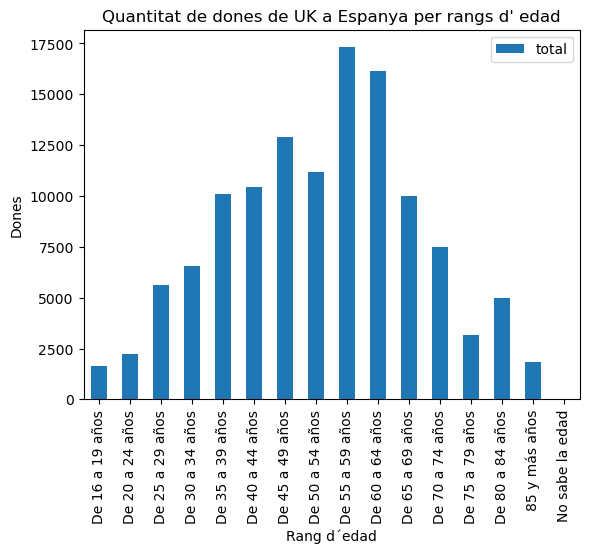

In [154]:
dones_uk = immigrants_df.where((immigrants_df.sexo == 'Mujeres' )
        & (immigrants_df.origen == 'Reino Unido') & (immigrants_df.grupos_edad != 'Total')).dropna()

dones_uk.plot.bar(x='grupos_edad',xlabel='Rang d´edad', ylabel='Dones',
        title="Quantitat de dones de UK a Espanya per rangs d' edad")

In [151]:
### volem saber:
### Immigrants a Espanya per rang d'edat

<AxesSubplot:title={'center':"Immigrants a Espanya per rang d'edat"}, ylabel='total'>

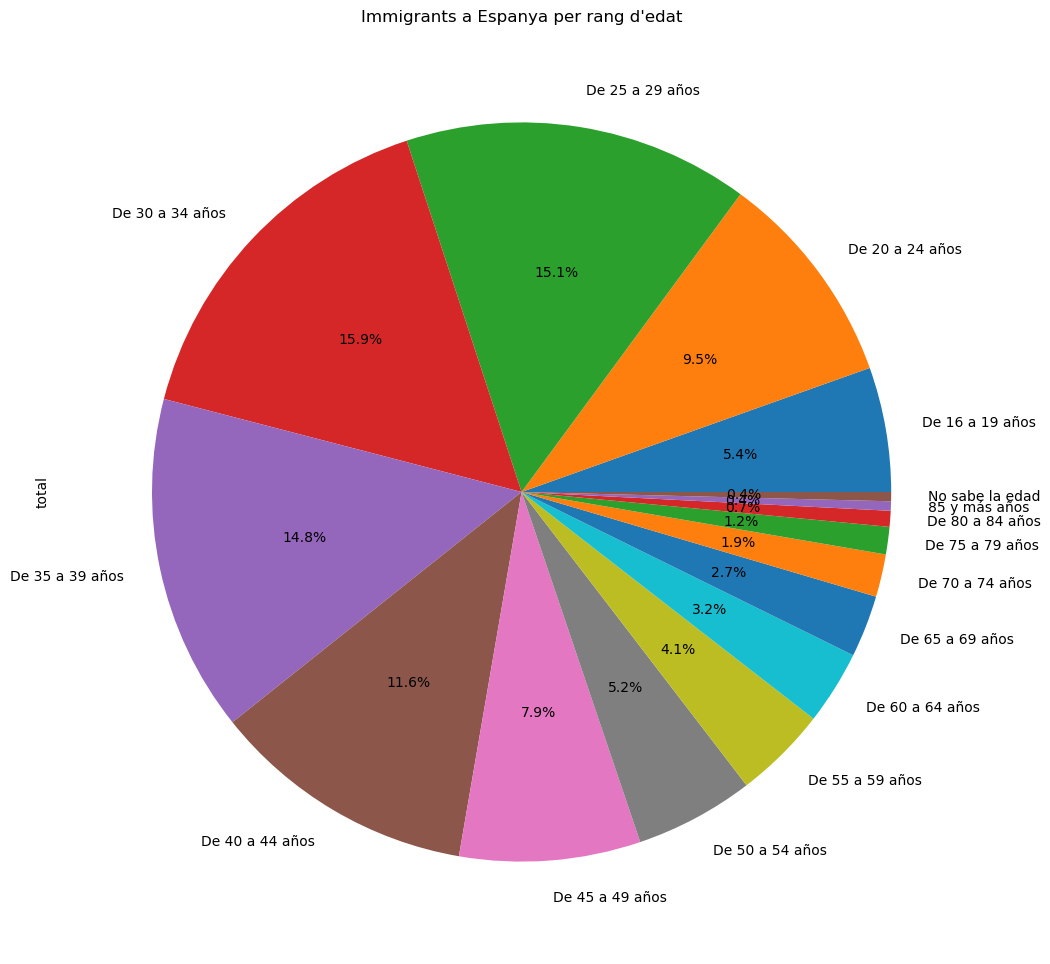

In [153]:
immigrants_x_rang = immigrants_df.where((immigrants_df.sexo == 'Total' )
        & (immigrants_df.origen == 'Total') & (immigrants_df.grupos_edad != 'Total')).dropna()
immigrants_x_rang.set_index('grupos_edad', inplace=True)
immigrants_x_rang.plot.pie(y='total', title="Immigrants a Espanya per rang d'edat",
        legend=False, autopct='%1.1f%%',  figsize=(12, 12))

### volem saber:
### Immigrants a espanya per Origen

<AxesSubplot:title={'center':'Immigrants a Espanya per origen'}, ylabel='total'>

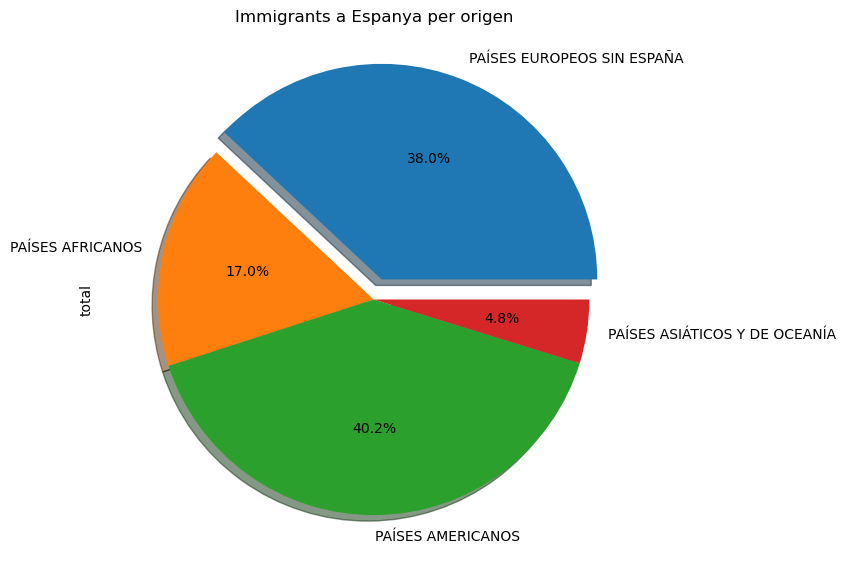

In [152]:
immigrants_x_origen = immigrants_df.where((immigrants_df.sexo == 'Total' )
& (immigrants_df.origen != 'Total') & (immigrants_df.grupos_edad == 'Total')).dropna()

origens = ['PAÍSES EUROPEOS SIN ESPAÑA', 'PAÍSES AFRICANOS', 'PAÍSES AMERICANOS', 
           'PAÍSES ASIÁTICOS Y DE OCEANÍA']
immigrants_x_continent = immigrants_x_origen[immigrants_x_origen['origen'].isin(origens)]


immigrants_x_continent.set_index('origen', inplace=True)
immigrants_x_continent.plot.pie(y='total', title="Immigrants a Espanya per origen",
    legend=False, autopct='%1.1f%%',  figsize=(7, 7), explode=(0.1, 0, 0, 0), shadow=True)